## Key numpy notes
- store data of all the same type in an array vs. list
- creating vectors and matrices
- easy operations and summary statistics using vectorized operations

In [1]:
import numpy as np

In [2]:
np.__version__

'1.15.4'

Lists vs. Arrays:
- flexibility means that each item in the list must contain it's own type info
- if all item are of the same type then there is a more efficient way to store the data ... fixed type array
- lists are flexible, can contain items of any type
- numpy arrays are not flexible but are much more efficient for storing and manipulating data


In [1]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
type(l[0])

int

In [4]:
l2 = [str(c) for c in l]
l2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
type(l2[0])

str

In [6]:
l3 = [True, "x", 8, 9.0]
[type(item) for item in l3]

[bool, str, int, float]

Fixed-Type Arrays
- 'i' is a type code indicating contents are integers
- but ndarray object in numpy is more useful

In [10]:
import array 
l = list(range(10))
a = array.array('i', l)
a

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating arrays using numpy
- can use np.array to create arrays from python lists
- all items must be of the same type
- if they do not match, python will upcast if possible (i.e. int upcast to float)
- arrays can be multi-dimensional

In [14]:
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

In [15]:
a = np.array([1.0, 2, 3, 4, 5, 6])
a

array([1., 2., 3., 4., 5., 6.])

In [18]:
# e.g. nested lists for multi-dimensional arrays
a = np.array([range(i, i + 3) for i in [2, 4, 6]])
a
# inner lists are treated as rows

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [21]:
# create an zero filled array
a = np.zeros(10, dtype = int)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# create a 3x5 array with 1.0's
a = np.ones((3, 5), dtype = float)
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [24]:
# create a 3x5 array with 10's
a = np.full((3, 5), 10)
a

array([[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

In [27]:
# create a linear sequence
# similar to range() function
a = np.arange(0, 10, 2)
a

array([0, 2, 4, 6, 8])

In [31]:
# create an evenly spaced of 5 values between 0 and 1
a = np.linspace(0, 1, 5)
a

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [38]:
# generate 3x3 of random uniform values between 0 and 1
a = np.random.random((3, 3))
a

array([[0.49174806, 0.46866065, 0.13796951],
       [0.93175307, 0.19582351, 0.22230197],
       [0.88217025, 0.99605374, 0.32293634]])

In [43]:
# generate 3x3 of random standard normals
a = np.random.normal(0, 1, (3, 3))
a

array([[ 0.35408389,  1.56322028, -1.4062144 ],
       [-0.62115096,  1.30622716,  0.66890425],
       [ 0.26904651, -0.36631791, -0.98870228]])

In [40]:
# generate 3x3 of random ints between 0 and 10
a = np.random.randint(0, 10, (3, 3))
a

array([[6, 1, 8],
       [8, 8, 8],
       [1, 6, 1]])

In [44]:
# create 3x3 identity matrix
a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
# create an uninitialized array of 3 ints
# values will be whatever happens to already exist in memory
a = np.empty(3)
a

array([1., 1., 1.])

### Universal Functions

Slowless of loops example: find the inverse of the values in an array

In [46]:
np.random.seed(123)

def compute_inverse(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [48]:
values = np.random.randint(1, 10, size = 5)
values

array([7, 2, 1, 2, 1])

In [49]:
compute_inverse(values)

array([0.14285714, 0.5       , 1.        , 0.5       , 1.        ])

This loop becomes really slow for a large volume of data (i.e. 1M values):
- takes approximately 1.4 seconds per loop
- bottleneck is the type-checking and function dispatches that must be done at each cycle of the loop
- each time the inverse is calculated, python looks at the type and looks up the correct function to use for that type

In [50]:
big_array = np.random.randint(1, 100, size = 1000000)

In [52]:
%timeit compute_inverse(big_array)

1.39 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**UFuncts**
- vectorized operations
- quick execution of repeated operations on values in a numpy array

In [54]:
# for example:
print(compute_inverse(values))
print(1.0 / values)

[0.14285714 0.5        1.         0.5        1.        ]
[0.14285714 0.5        1.         0.5        1.        ]


In [55]:
%timeit (1.0 / big_array)

1.66 ms ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [63]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [66]:
y = x.reshape((3, 3))
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [67]:
y ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

**Types of UFuncs**

Can handle all standard mathematical functions such as:
- array arithmetics (add, subtract, multiply, divide)
- power ( ** ) and log
- modulus (%)
- boolean operators
- trig

In [69]:
## + and np.add
x = np.arange(4)
x

array([0, 1, 2, 3])

In [70]:
x + 2

array([2, 3, 4, 5])

In [71]:
np.add(x, 2)

array([2, 3, 4, 5])

In [74]:
y = np.arange(-10, 10, 2)
y

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

In [75]:
abs(y)

array([10,  8,  6,  4,  2,  0,  2,  4,  6,  8])

In [76]:
np.absolute(y)

array([10,  8,  6,  4,  2,  0,  2,  4,  6,  8])

**Specialized ufuncs**
- use special from scipy
- gamma, beta, etc

In [4]:
from scipy import special
x = [1, 5, 10]
print('gamma(x) = ', special.gamma(x))

gamma(x) =  [1.0000e+00 2.4000e+01 3.6288e+05]


**Other stuff**

Outputing

In [84]:
# specify output with the "out" argument
# useful for very large arrays and saves memory
x = np.arange(5)
y = np.empty(5)

In [85]:
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


In [86]:
# write to every other element
y = np.zeros(10)
np.power(2, x, out = y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


Aggregate

In [87]:
x = np.arange(1, 6)
print(x)

[1 2 3 4 5]


In [90]:
# add all values of x together
# reduce repeatedly applies the operation until a single value remains
np.add.reduce(x)

15

In [91]:
np.subtract.reduce(x)

-13

In [92]:
np.multiply.reduce(x)

120

Cumulative calculations

In [95]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [96]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [97]:
np.subtract.accumulate(x)

array([  1,  -1,  -4,  -8, -13])

### Summary Statistics
- using the built in aggregation functions in numpy

In [98]:
# generate 100 random uniform values
l = np.random.random(100)

In [103]:
## inspect first 5 values
print(l[0:5])

[0.42546444 0.98768933 0.21602842 0.51718409 0.56645193]


In [104]:
# calculate sum of l
sum(l)

51.8639591024974

In [105]:
# calculate sum of l using the numpy version
np.sum(l)

51.8639591024974

In [109]:
# numpy version is faster!
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

56.9 ms ± 877 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
401 µs ± 5.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [110]:
np.min(big_array)

2.4560254799910197e-06

In [111]:
np.max(big_array)

0.9999976310835537

In [112]:
# can also use a different notation:
print(big_array.min(), big_array.max(), big_array.sum())

2.4560254799910197e-06 0.9999976310835537 499779.7617561451


**Aggregate along rows or columns**

In [115]:
# create a 3x4 matrix of unif(0,1)
m = np.random.random((3, 4))
print(m)

[[0.50802269 0.58022173 0.05119628 0.01207565]
 [0.73544921 0.66760426 0.46049994 0.63034293]
 [0.59697001 0.0731161  0.67939069 0.91222961]]


In [116]:
# sums all values in matrix
m.sum()

5.907119094950617

In [119]:
# specify axis
print(m.sum(axis=0)) # sum each column
print(m.sum(axis=1)) # sum each row

[1.84044191 1.32094209 1.1910869  1.55464819]
[1.15151635 2.49389635 2.2617064 ]


Example using some data

In [3]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [4]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')

In [5]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [6]:
# get mean, std, min, and max of heights
print("Average Height:      ", heights.mean())
print("Standard Deviation:  ", heights.std())
print("Shortest:            ", heights.min())
print("Tallest:             ", heights.max())

Average Height:       179.73809523809524
Standard Deviation:   6.931843442745892
Shortest:             163
Tallest:              193


In [7]:
# visualize the data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

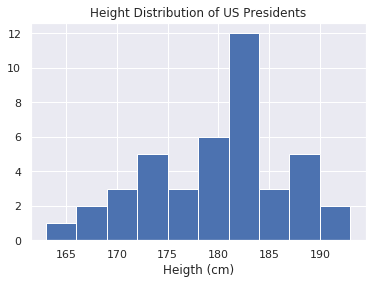

In [11]:
plt.hist(heights) # histogram
plt.title("Height Distribution of US Presidents")
plt.xlabel("Heigth (cm)"); # comma to suppress text output

### Broadcasting
- combining different shapes of vectors and matrices

In [12]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a)
print(b)

[0 1 2]
[5 5 5]


In [13]:
a + b # adding arrays of the same size

array([5, 6, 7])

In [14]:
a + 5 # add scalar 5 to all elements of a

array([5, 6, 7])

In [16]:
# example using matrices
m = np.ones((3, 3))
print(m)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [17]:
m + a # every row of m is added with elements from a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [20]:
# another example
a = np.arange(3) # row vector
b = np.arange(3)[:, np.newaxis] # column vector
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [21]:
print(a + b)

# a becomes:
"""
0 0 0
1 1 1
2 2 2
"""

# b becomes:
"""
0 1 2
0 1 2
0 1 2
"""

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [22]:
# more examples
m = np.ones((2, 3)) # 2x3 of 1s
a = np.arange(3)

print(m)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [23]:
print(m + a)

[[1. 2. 3.]
 [1. 2. 3.]]


In [25]:
b = np.arange(3).reshape((3, 1))
print(b)

[[0]
 [1]
 [2]]


In [26]:
print(b + a)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [28]:
n = np.ones((3, 2)) # 3x2
print(n)
print(a) # 3x1

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [29]:
print(n + a) # shapes do not match for broadcasting

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [31]:
# you can reshape a to make it compatible
new_a = a[:, np.newaxis]
print(new_a) # column vector
print(m)

[[0]
 [1]
 [2]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [34]:
print(m + a)

[[1. 2. 3.]
 [1. 2. 3.]]


**When is broadcasting useful?**


Center values around mean

In [36]:
# create 10x3 matrix of unif(0, 1)
x = np.random.random((10, 3))
print(x)

[[0.79698127 0.89019165 0.97632431]
 [0.07959477 0.36203239 0.50847073]
 [0.95703317 0.34003951 0.83766904]
 [0.60673879 0.82243838 0.42830425]
 [0.39395184 0.10535109 0.96332158]
 [0.04620402 0.98391298 0.03044289]
 [0.61022174 0.94671073 0.77871675]
 [0.81581698 0.41067081 0.05465244]
 [0.01136099 0.57632454 0.69979804]
 [0.49902489 0.17037817 0.14266966]]


In [39]:
xmean = x.mean(0) # average of columns
print(xmean)

[0.48169285 0.56080503 0.54203697]


In [40]:
# center x
x_centered = x - xmean
print(x_centered)

[[ 0.31528842  0.32938662  0.43428734]
 [-0.40209808 -0.19877263 -0.03356624]
 [ 0.47534032 -0.22076552  0.29563207]
 [ 0.12504594  0.26163335 -0.11373272]
 [-0.08774101 -0.45545394  0.42128462]
 [-0.43548882  0.42310796 -0.51159407]
 [ 0.12852889  0.38590571  0.23667978]
 [ 0.33412413 -0.15013422 -0.48738453]
 [-0.47033185  0.01551951  0.15776107]
 [ 0.01733205 -0.39042685 -0.39936731]]


In [46]:
x_centered.mean(0) # centered around 0

array([-8.88178420e-17, -9.99200722e-17,  6.66133815e-17])

Plotting a two-dimensional function
- define z = f(x, y)
- use broadcasting to compute the function across the grid

In [48]:
# create two vectors
# 50 values evenly spaced between 0 and 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

print(x[0:5])
print(y[0:5])

[0.         0.10204082 0.20408163 0.30612245 0.40816327]
[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]]


In [52]:
# define z as a function of x and y
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

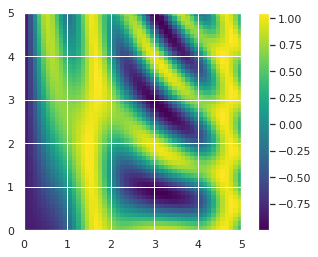

In [61]:
plt.imshow(z, origin = 'lower', extent = [0, 5, 0, 5],
          cmap = 'viridis')
plt.colorbar();

### Comparisons
- masks and boolean logic

In [65]:
import numpy as np
import pandas as pd

# extract rainfall as a numpy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
print(rainfall[0:10])

[  0  41  15   0   0   3 122  97  58  43]


In [66]:
inches = rainfall / 254.0 # convert mm to inches
inches.shape # 365 days of data

(365,)

In [67]:
# plot historgram of data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

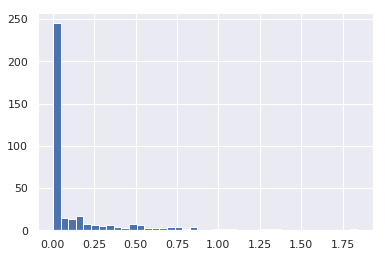

In [68]:
plt.hist(inches, 40);

Some questions to answer:
- how many days had rain?
- average amount of rain on rainy days?
- how many days had more than half inch of rain?

In [69]:
# use comparison operators
# simple example

x = np.array([1, 2, 3, 4, 5])
x < 3 # which elements are less than 3?

array([ True,  True, False, False, False])

In [74]:
# another example

rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [75]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [76]:
# how many elements in x is less than 6?
np.count_nonzero(x < 6)

8

In [78]:
# another way to get this value
np.sum(x < 6)

8

In [79]:
# np.sum can be applied to rows and columns
np.sum(x < 6, axis = 1) # how many values in each row?

array([4, 2, 2])

In [80]:
# are there any values greater than 8?
np.any(x > 8)

True

In [81]:
# are all values less than 10?
np.all(x < 10)

True

Now apply to rainfall data:

In [82]:
# how many days that have between 0.5 and 1 inch of rain?
np.sum((inches > 0.5) & (inches < 1))

29

In [83]:
# answers to the above questions about rainfall
print("Days without rain:        ", np.sum(inches == 0))
print("Days with rain:           ", np.sum(inches > 0))
print("Days with more than half inch of rain: ", np.sum(inches > 0.5))
print("Rainy days with less than 0.5 of rain: ", np.sum((inches > 0) & (inches <= 0.5)))

Days without rain:         215
Days with rain:            150
Days with more than half inch of rain:  37
Rainy days with less than 0.5 of rain:  113


**Boolean arrays as masks**
- select subsets of data that meets a certain criteria

In [84]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [86]:
# get array of values that are less than 5
y = x[x < 5]
print(y)

[0 3 3 3 2 4]


In [92]:
# example of masking on rainfall data

rainy = (inches > 0) # boolean array of rainy days

# define summer using days of year
days = np.arange(365)
summer = (days > 172) & (days < 262)

In [98]:
print("Median rain on rainy days:            ",
     np.median(inches[rainy]))
print("Median rain on summer days:           ",
     np.median(inches[summer]))
print("Maximum rain on summer days:          ",
     np.max(inches[summer]))
print("Median rain on non-summer rainy days: ",
     np.median(inches[rainy & ~summer]))

Median rain on rainy days:             0.19488188976377951
Median rain on summer days:            0.0
Maximum rain on summer days:           0.8503937007874016
Median rain on non-summer rainy days:  0.20078740157480315


**Constructing boolean arrays**

In [99]:
a = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
b = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

In [100]:
a | b

array([ True,  True,  True, False,  True,  True])

In [101]:
a & b

array([ True, False,  True, False,  True, False])

In [102]:
a or b # this will give an error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Fancy Indexing

In [103]:
import numpy as np

rand = np.random.RandomState(42)

In [105]:
x = rand.randint(100, size=10)
print(x)

[87 99 23  2 21 52  1 87 29 37]


In [106]:
# access elements in positions 3, 7, and 4
ind = [3, 7, 4]
x[ind]

array([ 2, 87, 21])

In [110]:
# shape of the results reflect the shape of index array
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[ 2, 87],
       [21, 52]])

In [112]:
# an array to subset a matrix
x = np.arange(12).reshape((3, 4)) # 3x4 matrix

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [113]:
# gives x at [0, 2], [1, 1], and [2, 3]
print(x[row, col])

[ 2  5 11]


In [114]:
# change row to column vector
row2 = row[:, np.newaxis]
print(row2)

[[0]
 [1]
 [2]]


In [115]:
# returns a matrix
print(x[row2, col])

[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]


**Combined Indexing**

In [117]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [118]:
x[2, [2, 0, 1]]  # simple + fancy

array([10,  8,  9])

In [119]:
x[1:, [2, 0, 1]]  # slice + fancy

array([[ 6,  4,  5],
       [10,  8,  9]])

In [128]:
mask = np.array([1, 0, 1, 0], dtype=bool)

print(x[row2, mask])  # returns 1st and 3rd column

[[ 0  2]
 [ 4  6]
 [ 8 10]]


**Uses of fancy indexing**
- select subset of rows from a matrix

In [180]:
# example
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]  # covariance matrix

# generate 1000 values from multivariate normal
x = rand.multivariate_normal(mean, cov, 100)

In [181]:
print(x[0:2, 0:2])

[[-1.28835386 -3.34910728]
 [-0.68632376 -0.51536955]]


In [182]:
x.shape

(100, 2)

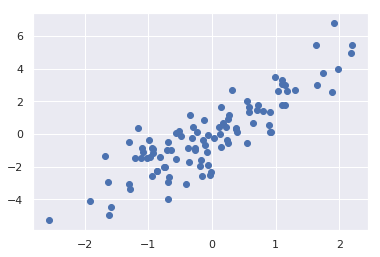

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(x[:, 0], x[:, 1]);

In [147]:
# select 20 random points from x

indices = np.random.choice(x.shape[0], 20, 
                          replace=False)
indices[0:5]

array([40,  1, 68, 62,  3])

In [148]:
x.shape[0]  # how many values to choose from

100

In [149]:
selection = x[indices]  # fancy indexing
selection.shape

(20, 2)

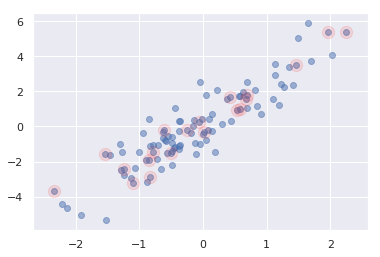

In [158]:
# plot to see which points were selected
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=150, alpha=0.1);

- modify values with fancy indexing

In [164]:
# example to change certain values in an array

x = np.arange(10)
i = np.array([1, 3, 5])
x[i] = -99  # set these values to -99
print(x)

[  0 -99   2 -99   4 -99   6   7   8   9]


In [165]:
# increase those values
x[i] += 10
print(x)

[  0 -89   2 -89   4 -89   6   7   8   9]


In [166]:
# adding example
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [168]:
np.add.at(x, i, 1)  # using at method
print(x)

[0. 0. 2. 4. 6. 0. 0. 0. 0. 0.]


- bining data

In [169]:
np.random.seed(42)  # set seed

x = np.random.randn(100)  # generate 100 random x values
x[0:5]

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

In [176]:
# create histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

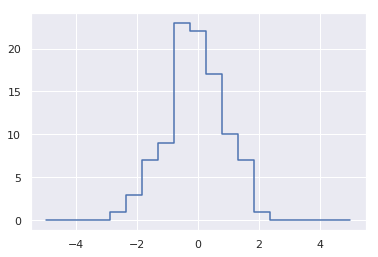

In [185]:
plt.plot(bins, counts, linestyle='steps');

### Sorting Arrays
- np.sort uses quicksort; mergesort and heapsort is available
- np.sort can sort columns and rows independently in a matrix

In [190]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)
# sort() will sort the array in place

array([1, 2, 3, 4, 5])

In [192]:
# argsort returns the indcies of the sorted elements
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [193]:
# now to use fancy indexing to get sorted x
x[i]

array([1, 2, 3, 4, 5])

**Partial Sorts**

In [194]:
# paritioning
# gives the k smallest value to the left
# arbitrary order

x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)  # 3 smallest

array([2, 1, 3, 4, 6, 5, 7])

In [195]:
# can also parition along an axis in a matrix
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [197]:
np.partition(x, 2, axis=1)
# first two slots in each row contain the smallest values

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [198]:
# example: k-nearest neighbours

x = rand.rand(10, 2)  # generate 10 random points

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]]


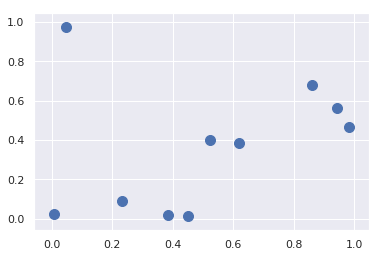

In [200]:
# plot data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(x[:, 0], x[:, 1], s=100);

In [206]:
# compute the distance between each pair of points
a = x[:, np.newaxis, :]
b = x[np.newaxis, :, :]

dist_sq = np.sum((a - b) ** 2, axis=-1)

In [209]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [210]:
# use np.argsort to sort along each row

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [213]:
# use np.argpartition to get k-nearest
k = 2
nearest_partition = np.argpartition(dist_sq, 
                                    k + 1, axis=1)
print(nearest_partition)

[[3 0 9 7 1 4 2 5 8 6]
 [1 4 7 9 3 5 6 2 8 0]
 [2 1 4 6 3 0 5 7 8 9]
 [3 9 7 0 1 5 6 2 8 4]
 [1 8 4 5 7 6 9 3 2 0]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 5 6 2 8 0]
 [8 5 6 4 1 7 9 3 2 0]
 [3 9 7 0 1 5 6 2 8 4]]


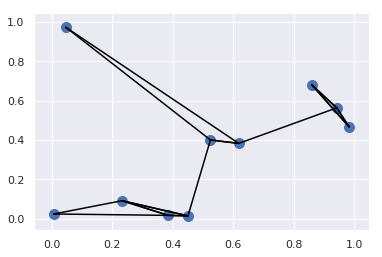

In [215]:
# plot results
plt.scatter(x[:, 0], x[:, 1], s=100)

# draw lines from each point to its 
# two nearest neighbours
k = 2

for i in range(x.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(x[j], x[i]), color='black')

### Structured Arrays
- efficient storage for compoind, heterogeneous data

In [222]:
# an example

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
# nothing that tells us these three arrays are related

# use a single structure to store the data
# create an empty container array
data = np.zeros(4, dtype={'names':
                          ('name', 'age', 'weight'),
                          'formats':
                          ('U10', 'i4', 'f8')})
print(data)

[('', 0, 0.) ('', 0, 0.) ('', 0, 0.) ('', 0, 0.)]


In [223]:
# fill in with data
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [224]:
# get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [225]:
# get first row
data[0]

('Alice', 25, 55.)

In [226]:
# get last row
data[-1]

('Doug', 19, 61.5)

In [229]:
# get names where age is less than 30
less_30 = data['age'] < 30
data[less_30]['name']

array(['Alice', 'Doug'], dtype='<U10')

**Record Arrays**
- similar to structured arrays
- fields can be accessed as attributes vs. dict keys

In [230]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [233]:
# recreate previous data as a record array
data_record = data.view(np.recarray)
print(data_record)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [235]:
data_record.age

array([25, 45, 37, 19], dtype=int32)